# The Problem

# Preprocessing the data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Importing the data and separating features and target variables in train data

In [2]:
train = pd.read_csv('datasets/train.csv')
y = train['SalePrice']
del train['SalePrice']
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [3]:
# Import test data
test = pd.read_csv('datasets/test.csv')
Id = test['Id']
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Missing Values

In [4]:
train.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [5]:
# calculating the percentage of missing values
train.isna().sum().sort_values(ascending=False)[:20] / train.shape[0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

Let's drop the columns that have more than 1,000 missing values and the column 'Id'.

In [6]:
train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
test.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

Let's analyse the other features with missing values to decide how to fill them.

## Separating the features in numerical or categorical

In [7]:
for col in train.columns:
    print(f'{col}: {train[col].dtypes}')

MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int64
Functional: object
Fir

In [8]:
for col in train.columns:
    print(train[col].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3

In [9]:
# Converting some features to categorical
cat_var = ['MSSubClass', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
          'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
          'GarageCars', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond']

for col in cat_var:
    train[col] = train[col].astype('object')
    test[col] = test[col].astype('object')

In [10]:
# Separating categorical features x numerical features
num_var = []
cat_var = []

for col in train.columns:
    if train[col].dtype == 'object':
        cat_var.append(col)
    else:
        num_var.append(col)

### Examinating Numerical Features

In [11]:
df_num = pd.DataFrame()

for col in num_var:
    df_num[col] = train[col]
    
df_num['SalePrice'] = y

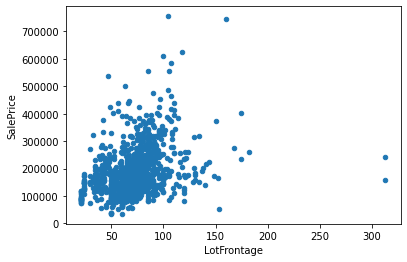

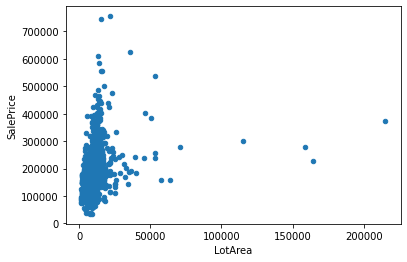

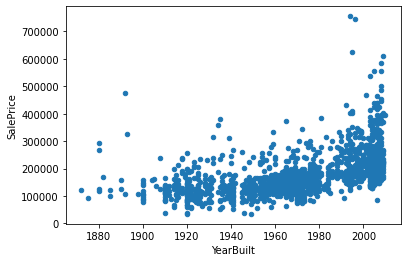

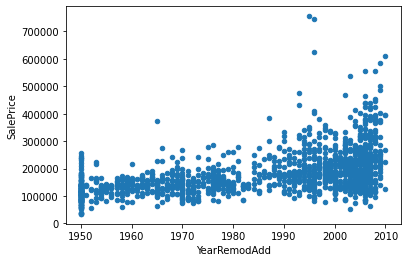

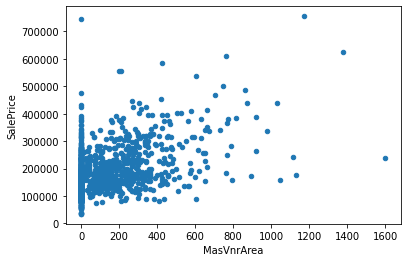

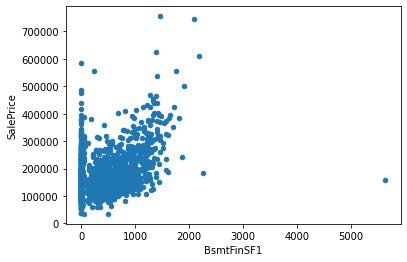

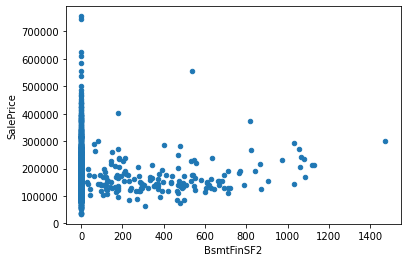

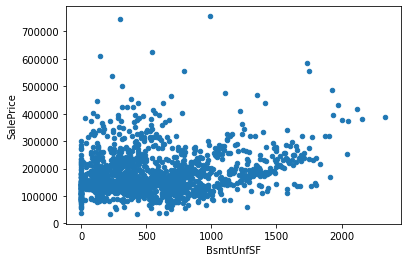

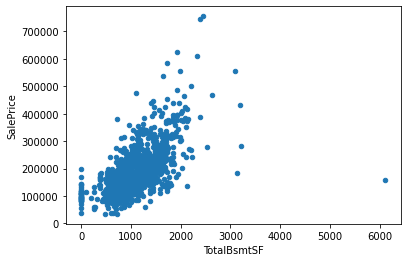

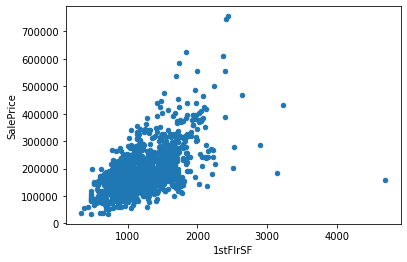

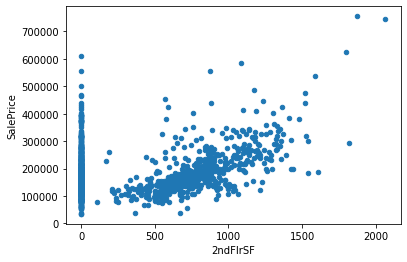

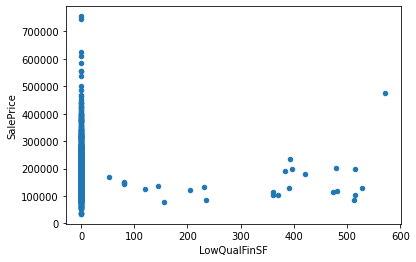

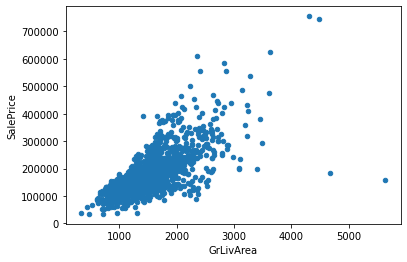

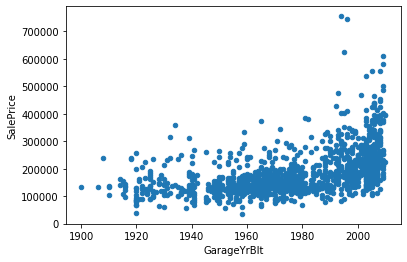

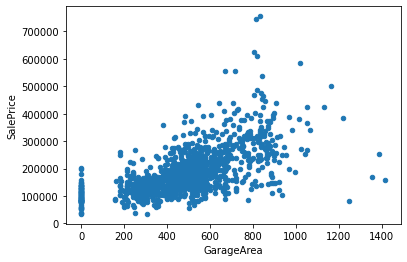

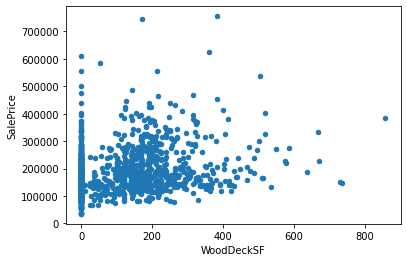

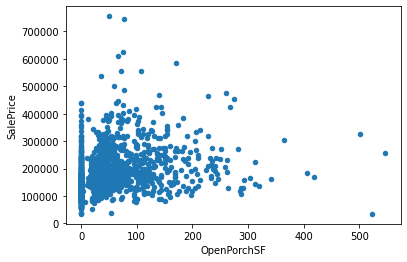

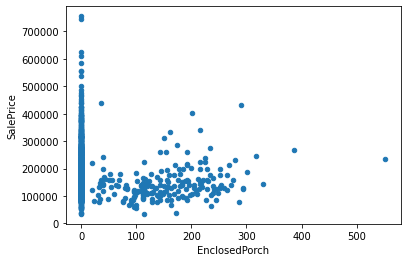

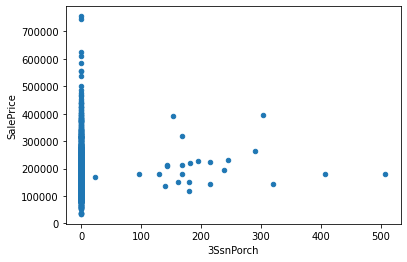

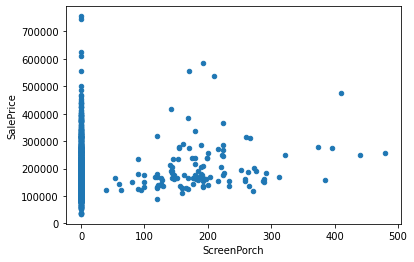

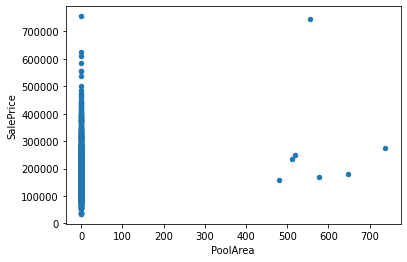

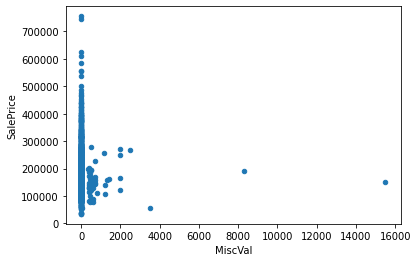

In [12]:
for col in num_var:
    df_num.plot.scatter(col, 'SalePrice')

In [13]:
# eliminating features that are not relevant
discard = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
             'ScreenPorch', 'PoolArea', 'MiscVal']

train.drop(discard, axis=1, inplace=True)
test.drop(discard, axis=1, inplace=True)

In [14]:
# Updating numerical features
num_var = []

for col in train.columns:
    if train[col].dtype != 'object':
        num_var.append(col)

### Filling missing data

In [15]:
train[num_var].isna().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
OpenPorchSF       0
WoodDeckSF        0
GarageArea        0
GrLivArea         0
2ndFlrSF          0
1stFlrSF          0
TotalBsmtSF       0
BsmtUnfSF         0
BsmtFinSF1        0
YearRemodAdd      0
YearBuilt         0
LotArea           0
dtype: int64

#### LotFrontage

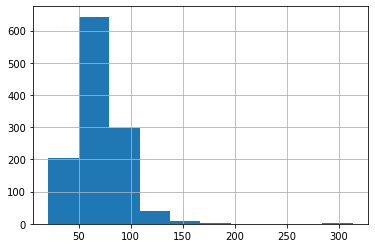

In [16]:
train['LotFrontage'].hist();

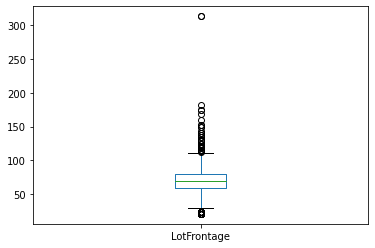

In [17]:
train['LotFrontage'].plot.box();

We can see that there are outliers in this feature, so fill the missing data with mean is not a good thing. Let's fill the missing values with the mode.

In [18]:
# filling the missing data with the mode
train['LotFrontage'].fillna(train['LotFrontage'].mode()[0], inplace=True)
test['LotFrontage'].fillna(train['LotFrontage'].mode()[0], inplace=True)

#### GarageYrBlt

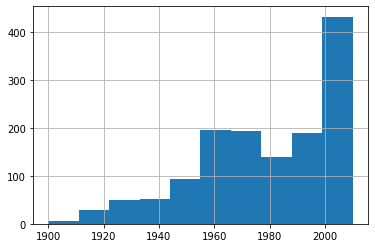

In [19]:
train['GarageYrBlt'].hist();

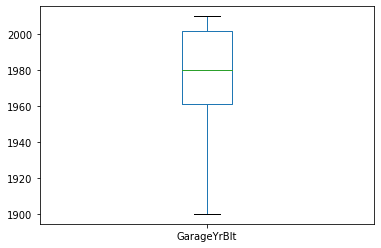

In [20]:
train['GarageYrBlt'].plot.box();

There isn't outliers is this features but the data are not simetric distributed, so let's fill the missing data with the median.

In [21]:
# filling the missing data with the mean
train['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].median(), inplace=True)

#### MasVnrArea

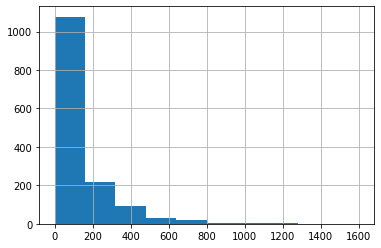

In [22]:
train['MasVnrArea'].hist();

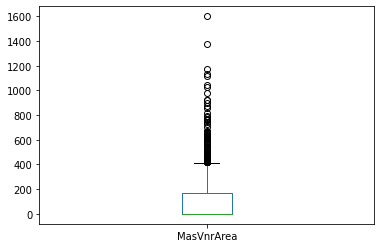

In [23]:
train['MasVnrArea'].plot.box();

This features have a lot of outliers, so let's fill the missing data with the mode.

In [24]:
# filling the missing data with the mean
train['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0], inplace=True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mode()[0], inplace=True)

All the missing values for numerical features are filled, as we can see below.

In [25]:
train[num_var].isna().sum()

LotFrontage     0
LotArea         0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
GarageYrBlt     0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
dtype: int64

### Scaling the Numerical Data

In [26]:
scaler = StandardScaler()
#scaler.fit_transform(train[num_var])
train_num_scaled = pd.DataFrame(scaler.fit_transform(train[num_var]), columns=train[num_var].columns)
train_num_scaled.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF
0,-0.146189,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,1.161852,0.370333,1.017598,0.351000,-0.752176,0.216503
1,0.524992,-0.091886,0.156734,-0.429577,-0.570750,1.171992,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.107927,-0.060731,1.626195,-0.704483
2,-0.011953,0.073480,0.984752,0.830215,0.325915,0.092907,-0.301643,-0.313369,-0.627826,1.189351,0.515013,0.934226,0.631726,-0.752176,-0.070361
3,-0.369915,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,0.383659,0.809167,0.790804,-0.752176,-0.176048
4,0.703973,0.375148,0.951632,0.733308,1.366489,0.463568,-0.174865,0.199680,-0.045611,1.617877,1.299326,0.892540,1.698485,0.780197,0.563760


In [27]:
test_num_scaled = pd.DataFrame(scaler.transform(test[num_var]), columns=test[num_var].columns)

### Examinating Categorical Features

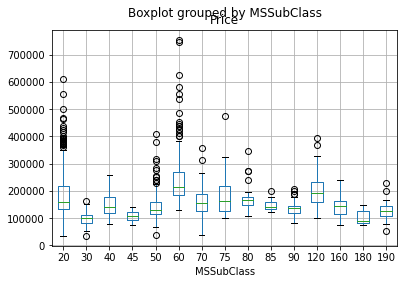

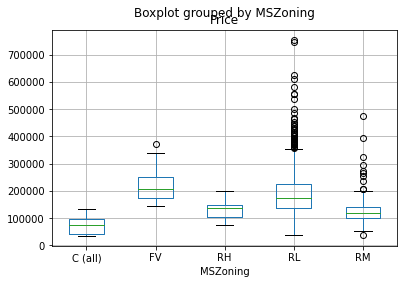

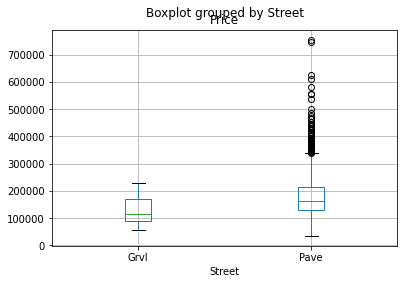

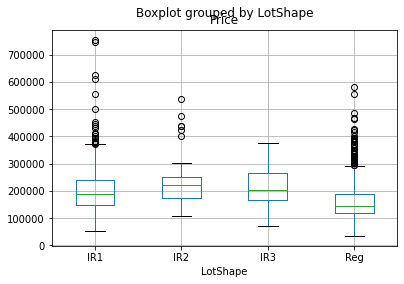

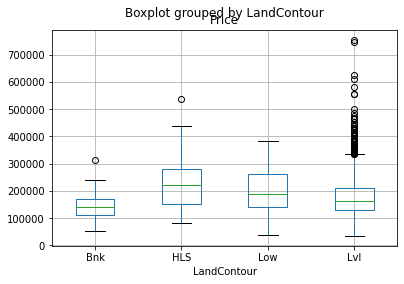

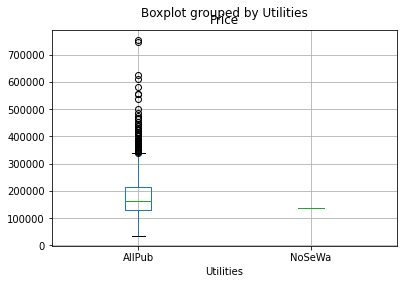

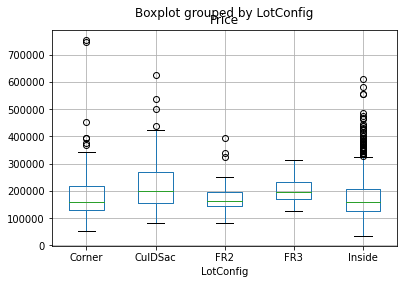

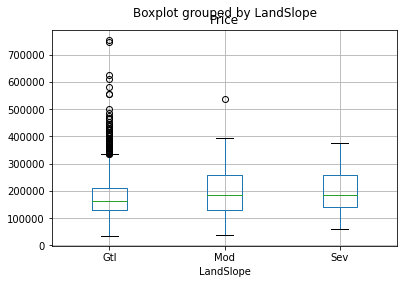

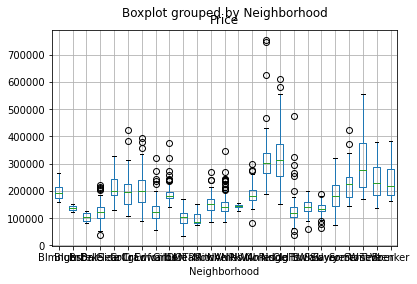

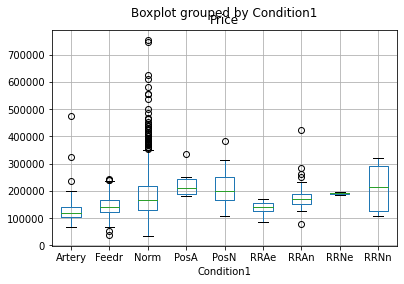

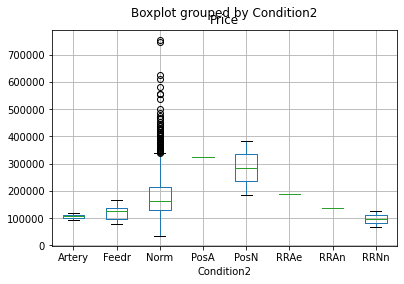

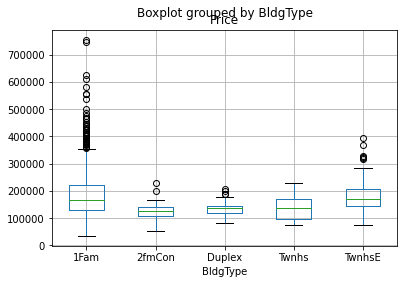

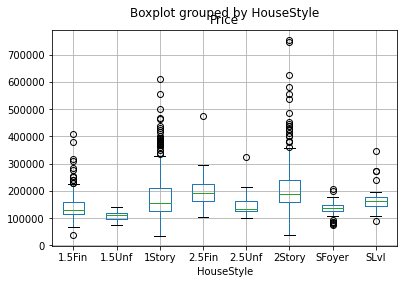

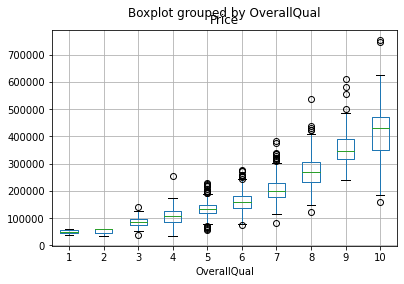

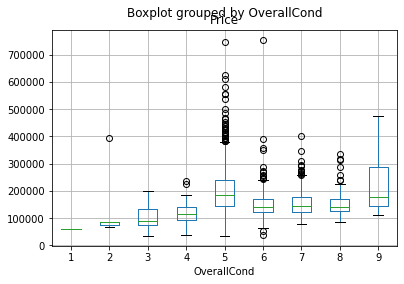

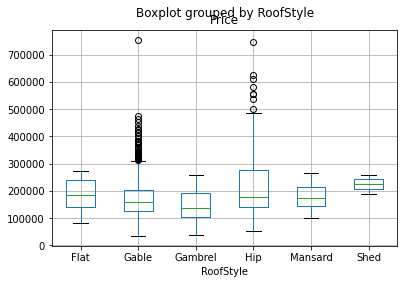

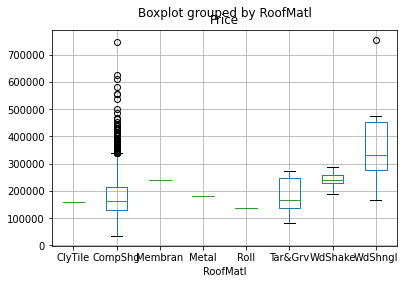

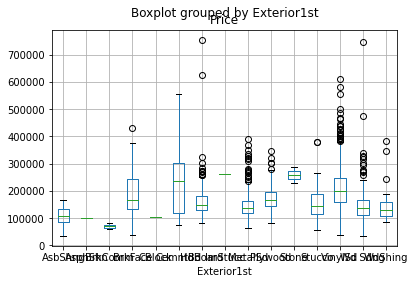

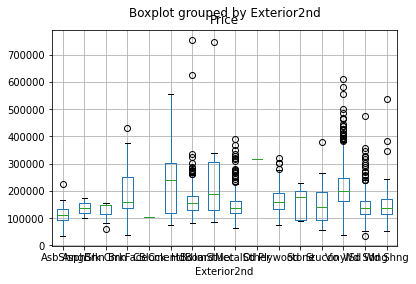

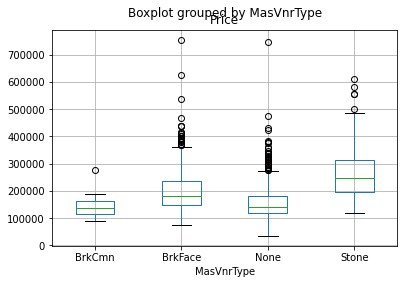

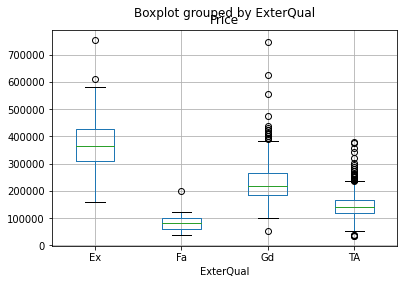

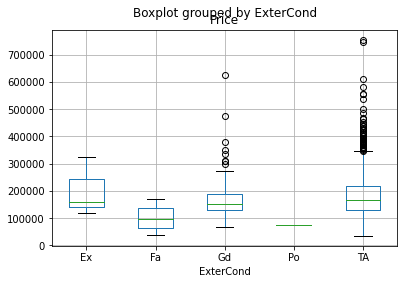

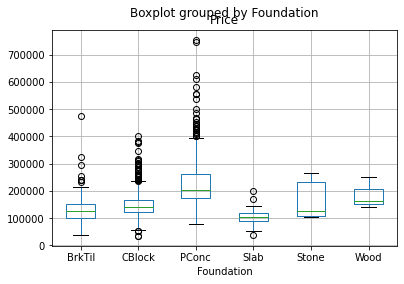

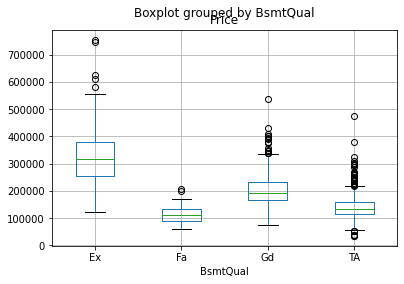

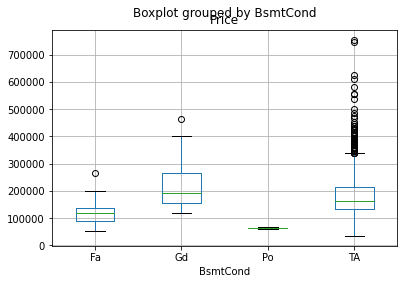

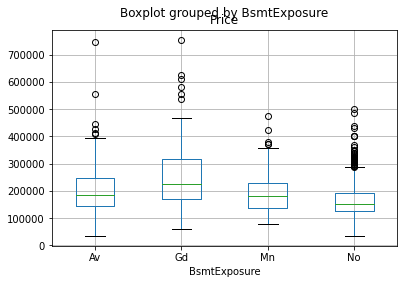

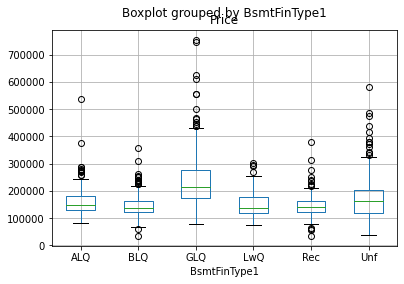

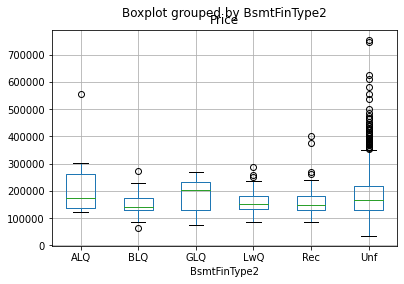

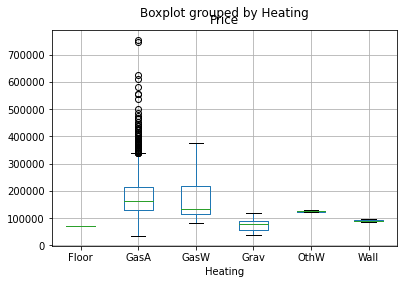

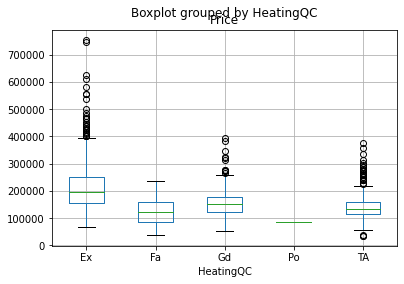

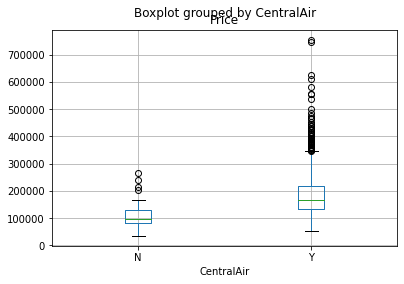

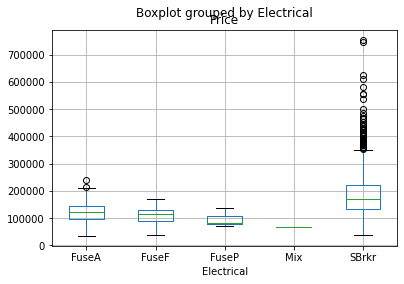

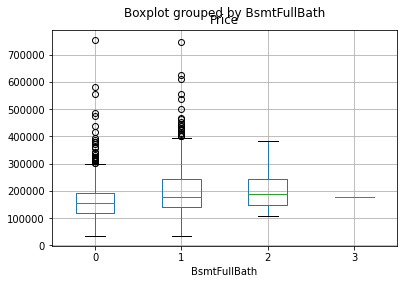

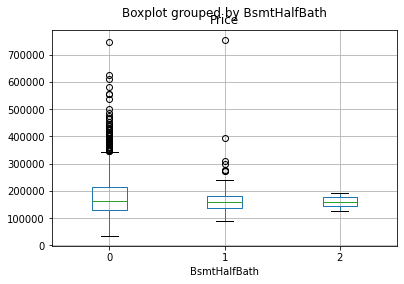

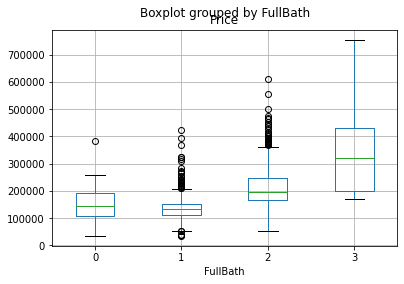

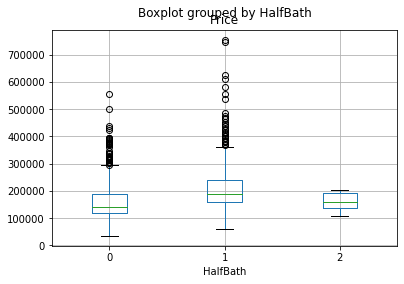

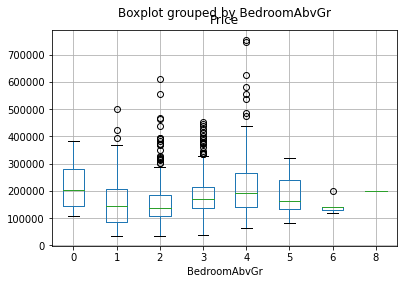

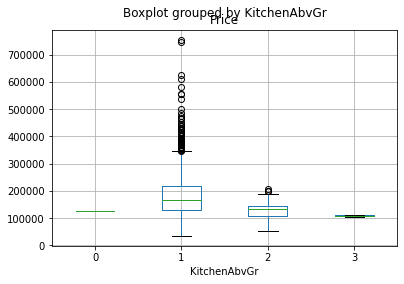

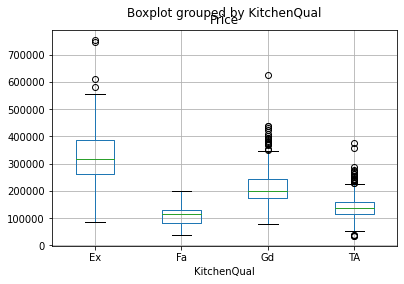

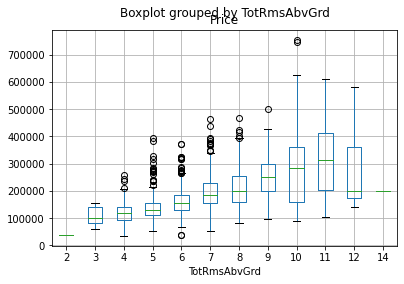

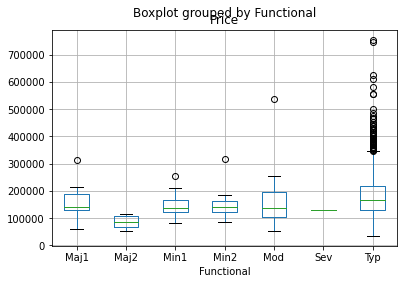

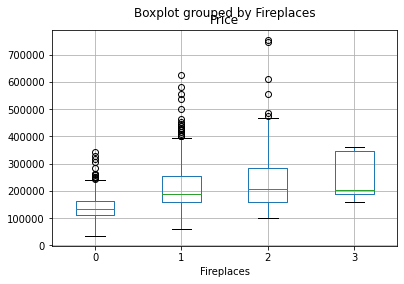

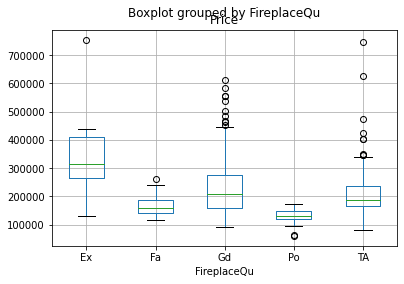

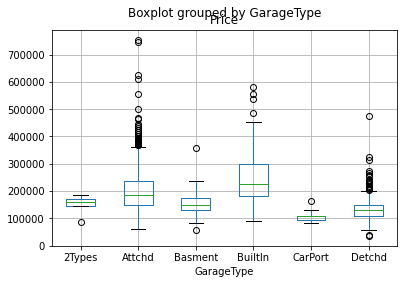

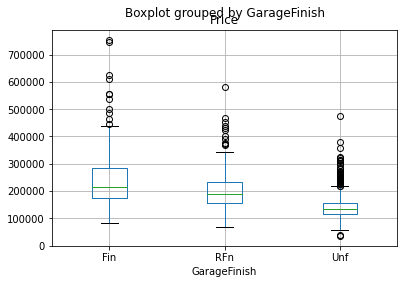

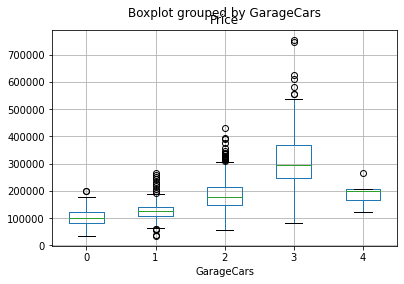

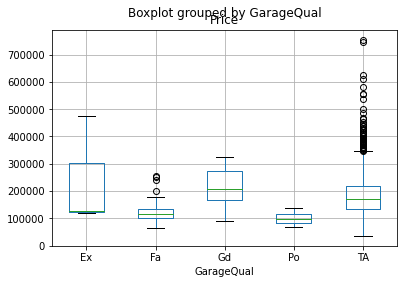

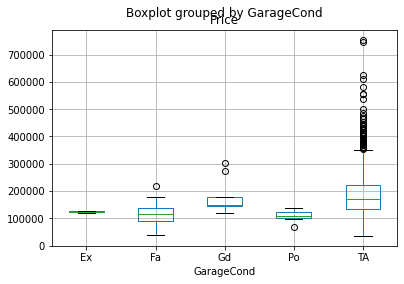

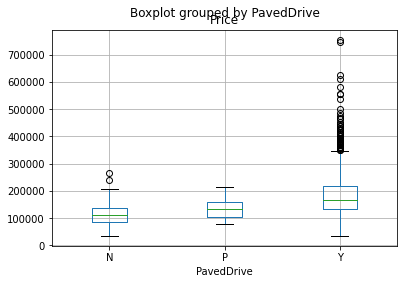

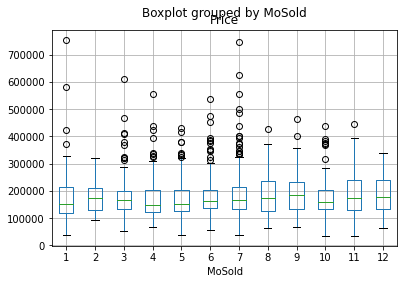

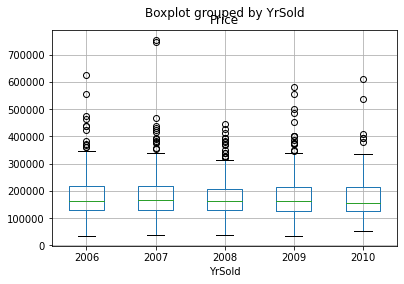

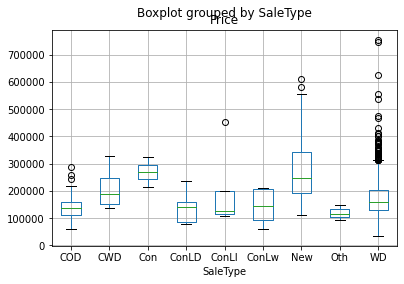

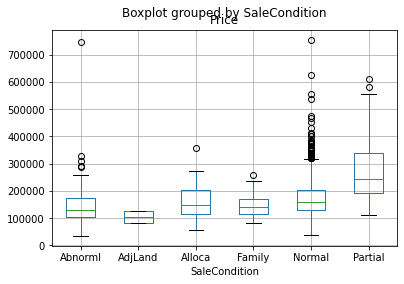

In [28]:
for col in cat_var:
    df = pd.DataFrame({'Price':y, col:train[col]})
    df.boxplot(column='Price', by=col);

In [29]:
# dropping categorical features that aren't relevant
discard2 = ['MSSubClass', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
            'Neighborhood', 'Condition1', 'HouseStyle', 'OverallCond', 'RoofStyle',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtExposure', 'BsmtFinType1',
            'BsmtFinType2', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr',
            'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 
            'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

train.drop(discard2, axis=1, inplace=True)
test.drop(discard2, axis=1, inplace=True)

In [30]:
# Updating the categorical features
cat_var = []

for col in train.columns:
    if train[col].dtype == 'object':
        cat_var.append(col)

In [31]:
train[cat_var].isna().sum().sort_values(ascending=False)[:6]

GarageQual    81
GarageCond    81
BsmtCond      37
BsmtQual      37
Electrical     1
PavedDrive     0
dtype: int64

### GarageQual

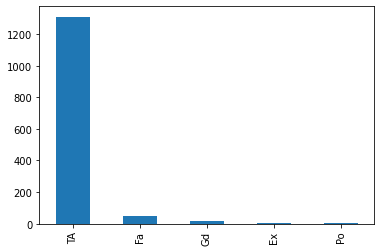

In [32]:
train['GarageQual'].value_counts().plot.bar();

In [33]:
# Let's fill the missing data with the bigger class
train['GarageQual'].fillna(train['GarageQual'].mode()[0], inplace=True)
test['GarageQual'].fillna(train['GarageQual'].mode()[0], inplace=True)

### GarageCond

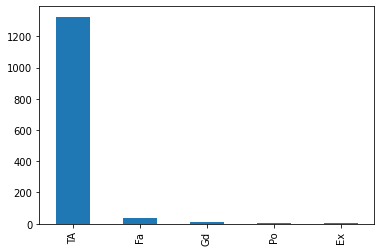

In [34]:
train['GarageCond'].value_counts().plot.bar();

In [35]:
# Let's fill the missing data with the bigger class
train['GarageCond'].fillna(train['GarageCond'].mode()[0], inplace=True)
test['GarageCond'].fillna(train['GarageCond'].mode()[0], inplace=True)

### BsmtCond

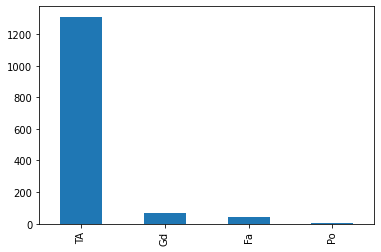

In [36]:
train['BsmtCond'].value_counts().plot.bar();

In [37]:
# Let's fill the missing data with the bigger class
train['BsmtCond'].fillna(train['BsmtCond'].mode()[0], inplace=True)
test['BsmtCond'].fillna(train['BsmtCond'].mode()[0], inplace=True)

### BsmtQual

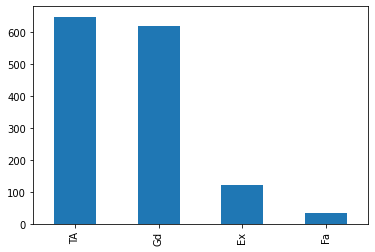

In [38]:
train['BsmtQual'].value_counts().plot.bar();

In [39]:
# Let's fill the missing data with the bigger class
train['BsmtQual'].fillna(train['BsmtQual'].mode()[0], inplace=True)
test['BsmtQual'].fillna(train['BsmtQual'].mode()[0], inplace=True)

### Electrical

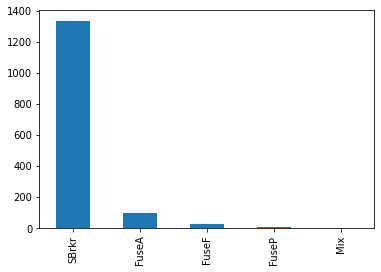

In [40]:
train['Electrical'].value_counts().plot.bar();

In [41]:
# Let's fill the missing data with the bigger class
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
test['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)

Let's check for missing values in the test data

In [42]:
test.isna().sum().sort_values(ascending=False)[:10]

MSZoning        4
Functional      2
BsmtHalfBath    2
BsmtFinSF1      1
BsmtUnfSF       1
KitchenQual     1
TotalBsmtSF     1
GarageArea      1
GarageCars      1
GarageYrBlt     0
dtype: int64

The other features that have missing values in the test data, have no missing values in the train data. There are just a few missing values, so let's drop this observations.

In [43]:
test.dropna(axis=0, inplace=True)

## Applying One Hot Encoder

In [44]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
train_encoded = pd.DataFrame(encoder.fit_transform(train[cat_var]))
train_encoded.columns = encoder.get_feature_names_out(cat_var)
train = pd.concat([train_num_scaled, train_encoded], axis=1)
train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,-0.146189,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,1.161852,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.524992,-0.091886,0.156734,-0.429577,-0.570750,1.171992,-0.641228,0.466465,0.257140,-0.795163,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.011953,0.073480,0.984752,0.830215,0.325915,0.092907,-0.301643,-0.313369,-0.627826,1.189351,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.369915,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.703973,0.375148,0.951632,0.733308,1.366489,0.463568,-0.174865,0.199680,-0.045611,1.617877,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [45]:
test_encoded = pd.DataFrame(encoder.transform(test[cat_var]))
test_encoded.columns = encoder.get_feature_names_out(cat_var)
test = pd.concat([test_num_scaled, test_encoded], axis=1)
test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,0.524992,0.110763,-0.340077,-1.156380,-0.570750,0.053428,-0.672923,-0.400017,-0.689929,-0.795163,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.569737,0.375850,-0.439440,-1.301740,0.027027,1.051363,-0.365032,0.619239,0.430511,-0.795163,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.256520,0.332053,0.852269,0.636400,-0.570750,0.761852,-0.974021,-0.295127,-0.607125,0.811239,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.435501,-0.054002,0.885390,0.636400,-0.460051,0.347326,-0.550672,-0.299687,-0.612300,0.758532,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.130586,-0.552407,0.686666,0.345679,-0.570750,-0.396190,1.018211,0.507509,0.303718,-0.795163,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Modelo Base

Now that the data are already processed, let's fit some models.

In [46]:
# Separating the train and test data in features and label
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Define a random forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
rf_val_predictions = rf_model.predict(X_val)
rf_val_mae = mean_absolute_error(rf_val_predictions, y_val)

print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

Validation MAE for Random Forest Model: 17,835


# Model 1 - RandomForest

In [95]:
# Defining the hyperparameter space
params = {'n_estimators':[25,50,70,100],
         'max_depth':[50,100,150,200,250],
         'min_samples_split':[2,3,4,5,8,10,25,35],
         'min_samples_leaf':[1,3,5],
         'max_features':["auto", "sqrt", "log2"]}

In [96]:
# Define a random forest model and applying RandomizedSearchCV
model2 = RandomForestRegressor(random_state=42)
reg = RandomizedSearchCV(model2, params, random_state=42)
search = reg.fit(X_train, y_train)
bests = search.best_params_
bests

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 100}

In [97]:
model2 = search.best_estimator_
model2.fit(X_train, y_train)
val_predictions2 = model2.predict(X_val)
val_mae2 = mean_absolute_error(val_predictions2, y_val)

print(f"Validation MAE for Random Forest Model: {val_mae2}")

Validation MAE for Random Forest Model: 18240.811570391044


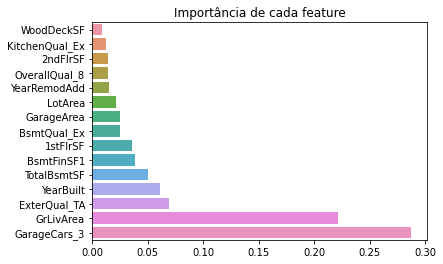

In [98]:
bests = np.sort(model2.feature_importances_)[-15:]
index = []
for importancia in bests:
    index.append(np.where(model2.feature_importances_ == importancia)[0][0])

names = model2.feature_names_in_[index]
sns.barplot(x=bests, y=names, orient='h').set_title('Importância de cada feature');

# Modelo 3

In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric':'mae'
}

In [54]:
num_boost_round = 499

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Val")],
    early_stopping_rounds=20
)

print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Val-mae:126628.52344
[1]	Val-mae:89266.08594
[2]	Val-mae:63617.60156
[3]	Val-mae:46674.24609
[4]	Val-mae:35563.78125
[5]	Val-mae:28858.31836
[6]	Val-mae:24982.82617
[7]	Val-mae:22815.29492
[8]	Val-mae:21373.71484
[9]	Val-mae:20825.62109
[10]	Val-mae:20220.79492
[11]	Val-mae:19881.93750
[12]	Val-mae:19742.67188
[13]	Val-mae:19771.83984
[14]	Val-mae:19847.49219
[15]	Val-mae:19868.82812
[16]	Val-mae:19805.42969
[17]	Val-mae:19783.03711
[18]	Val-mae:19794.29297
[19]	Val-mae:19735.45117
[20]	Val-mae:19636.44922
[21]	Val-mae:19569.42383
[22]	Val-mae:19652.54102
[23]	Val-mae:19666.05469
[24]	Val-mae:19621.06641
[25]	Val-mae:19635.79883
[26]	Val-mae:19625.86719
[27]	Val-mae:19689.04688
[28]	Val-mae:19648.54297
[29]	Val-mae:19598.86328
[30]	Val-mae:19573.24609
[31]	Val-mae:19570.41797
[32]	Val-mae:19656.89648
[33]	Val-mae:19632.80664
[34]	Val-mae:19656.11719
[35]	Val-mae:19625.23242
[36]	Val-mae:19583.66797
[37]	Val-mae:19585.81641
[38]	Val-mae:19570.45898
[39]	Val-mae:19560.45703
[40]	Val-

In [55]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=30
)

cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,128044.512500,443.466656,128144.309375,1835.819616
1,90510.217188,289.248868,90967.993750,1016.829834
2,64113.530469,234.286394,65241.159375,547.017239
3,45640.858594,196.283846,47811.442188,378.161497
4,32814.985938,194.798071,36350.414062,550.027792
5,24032.477344,162.159681,29220.774609,851.291405
6,18212.137109,161.404882,24907.473437,1105.256221
7,14548.490039,209.838001,22399.498047,1282.493224
8,12302.519141,187.978888,21250.808594,1415.553401
9,10893.808203,154.412150,20583.638672,1554.051109


In [56]:
cv_results['test-mae-mean'].min()

19340.486719

In [57]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [58]:
min_mae = float("Inf")
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
        
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
	MAE 19361.254297 for 18 rounds
CV with max_depth=9, min_child_weight=6
	MAE 19905.8503906 for 18 rounds
CV with max_depth=9, min_child_weight=7
	MAE 19511.4144532 for 31 rounds
CV with max_depth=10, min_child_weight=5
	MAE 19341.134375 for 14 rounds
CV with max_depth=10, min_child_weight=6
	MAE 19682.9527344 for 23 rounds
CV with max_depth=10, min_child_weight=7
	MAE 19535.9304688 for 15 rounds
CV with max_depth=11, min_child_weight=5
	MAE 19403.9269532 for 18 rounds
CV with max_depth=11, min_child_weight=6
	MAE 19622.661718800002 for 14 rounds
CV with max_depth=11, min_child_weight=7
	MAE 19347.355469 for 14 rounds
Best params: 10, 5, MAE: 19341.134375


In [59]:
params['max_depth'] = best_params[0]
params['min_child_weight'] = best_params[1]

In [60]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [61]:
min_mae = float("Inf")
best_params = None# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 19341.134375 for 14 rounds
CV with subsample=1.0, colsample=0.9
	MAE 19435.147265800002 for 23 rounds
CV with subsample=1.0, colsample=0.8
	MAE 19577.754297 for 13 rounds
CV with subsample=1.0, colsample=0.7
	MAE 19652.7484376 for 20 rounds
CV with subsample=0.9, colsample=1.0
	MAE 19709.6015624 for 21 rounds
CV with subsample=0.9, colsample=0.9
	MAE 18981.2582032 for 15 rounds
CV with subsample=0.9, colsample=0.8
	MAE 19184.2371094 for 20 rounds
CV with subsample=0.9, colsample=0.7
	MAE 19659.0140626 for 16 rounds
CV with subsample=0.8, colsample=1.0
	MAE 19483.06875 for 19 rounds
CV with subsample=0.8, colsample=0.9
	MAE 20115.882422000002 for 16 rounds
CV with subsample=0.8, colsample=0.8
	MAE 19946.852344 for 32 rounds
CV with subsample=0.8, colsample=0.7
	MAE 19630.842969 for 15 rounds
CV with subsample=0.7, colsample=1.0
	MAE 19655.3078128 for 19 rounds
CV with subsample=0.7, colsample=0.9
	MAE 20449.225 for 25 rounds
CV with subsample=0.

In [62]:
params['subsample'] = best_params[0]
params['colsample_bytree'] = best_params[1]

In [63]:
min_mae = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))    # We update our parameters
    params['eta'] = eta    # Run and time CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['mae'],
        early_stopping_rounds=10)    # Update best score
    
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
        
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
	MAE 18981.2582032 for 15 rounds

CV with eta=0.2
	MAE 18749.126172 for 20 rounds

CV with eta=0.1
	MAE 17870.8822268 for 64 rounds

CV with eta=0.05
	MAE 17722.498046999997 for 109 rounds

CV with eta=0.01
	MAE 17667.086523600003 for 498 rounds

CV with eta=0.005
	MAE 23471.4507812 for 498 rounds

Best params: 0.01, MAE: 17667.086523600003


In [64]:
params['eta'] = best_params

In [65]:
num_boost_round = model.best_iteration + 1

best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Val")]
)

print("Best MAE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))

[0]	Val-mae:177073.07812
[1]	Val-mae:175342.48438
[2]	Val-mae:173634.82812
[3]	Val-mae:171937.57812
[4]	Val-mae:170248.87500
[5]	Val-mae:168551.60938
[6]	Val-mae:166887.21875
[7]	Val-mae:165234.17188
[8]	Val-mae:163614.78125
[9]	Val-mae:162005.34375
[10]	Val-mae:160418.60938
[11]	Val-mae:158830.75000
[12]	Val-mae:157267.89062
[13]	Val-mae:155709.46875
[14]	Val-mae:154197.60938
[15]	Val-mae:152682.53125
[16]	Val-mae:151165.75000
[17]	Val-mae:149702.43750
[18]	Val-mae:148232.39062
[19]	Val-mae:146775.03125
[20]	Val-mae:145346.18750
[21]	Val-mae:143939.73438
[22]	Val-mae:142520.73438
[23]	Val-mae:141119.29688
[24]	Val-mae:139727.23438
[25]	Val-mae:138354.67188
[26]	Val-mae:137027.50000
[27]	Val-mae:135683.39062
[28]	Val-mae:134343.81250
[29]	Val-mae:133034.28125
[30]	Val-mae:131704.10938
[31]	Val-mae:130411.78125
[32]	Val-mae:129124.68750
[33]	Val-mae:127836.27344
[34]	Val-mae:126550.75000
[35]	Val-mae:125300.14844
[36]	Val-mae:124053.20312
[37]	Val-mae:122826.08594
[38]	Val-mae:121616.10

In [66]:
mean_absolute_error(best_model.predict(dval), y_val)

119236.9346973994

In [67]:
#best_model.save_model("my_model.model")

In [68]:
#loaded_model = xgb.Booster()
#loaded_model.load_model("my_model.model")# And use it for predictions.

# Modelo 4

In [69]:
from sklearn.linear_model import BayesianRidge

In [70]:
params4 = {'n_iter':[100,300,500],
           'tol':[0.1, 0.01, 0.001, 0.0001],
           'alpha_1':[1e-04,1e-06,1e-08],
           'alpha_2':[1e-04,1e-06,1e-08],
           'lambda_1':[1e-04,1e-06,1e-08],
           'lambda_2':[1e-04,1e-06,1e-08],
           'fit_intercept':[True,False]}

In [71]:
# Define a random forest model
model4 = BayesianRidge()
reg4 = RandomizedSearchCV(model4, params4, random_state=42)
search = reg4.fit(X_train, y_train)
bests = search.best_params_
bests

{'tol': 0.001,
 'n_iter': 300,
 'lambda_2': 1e-06,
 'lambda_1': 0.0001,
 'fit_intercept': False,
 'alpha_2': 1e-06,
 'alpha_1': 1e-08}

In [72]:
model4 = search.best_estimator_
model4.fit(X_train, y_train)
val_predictions4 = model4.predict(X_val)
val_mae4 = mean_absolute_error(val_predictions4, y_val)

print(f"Validation MAE for Bayesian Ridge Model: {val_mae4}")

Validation MAE for Bayesian Ridge Model: 17903.684635145335


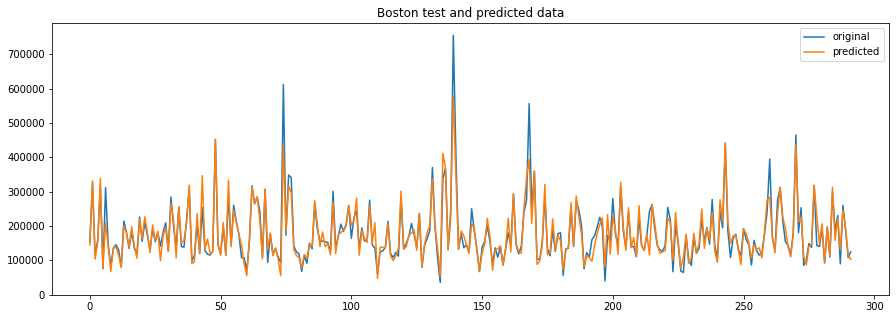

In [73]:
x_ax = range(len(val_predictions4))
plt.figure(figsize=(15,5))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, val_predictions4, label="predicted")

plt.title("Boston test and predicted data")

plt.legend()
plt.show()

# Modelo 5

In [74]:
from sklearn.svm import SVR

In [91]:
params5 = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'degree':[5,10,15,20,30,50],
          'C':[200,500,700,900,1100]}

In [92]:
# Define a random forest model
model5 = SVR()
reg5 = RandomizedSearchCV(model5, params5, random_state=42)
search = reg5.fit(X_train, y_train)
bests = search.best_params_
bests

{'kernel': 'linear', 'degree': 30, 'C': 700}

In [93]:
model5 = search.best_estimator_
model5.fit(X_train, y_train)
val_predictions5 = model5.predict(X_val)
val_mae5 = mean_absolute_error(val_predictions5, y_val)

print(f"Validation MAE for SVM Model: {val_mae5}")

Validation MAE for SVM Model: 18594.350493749775


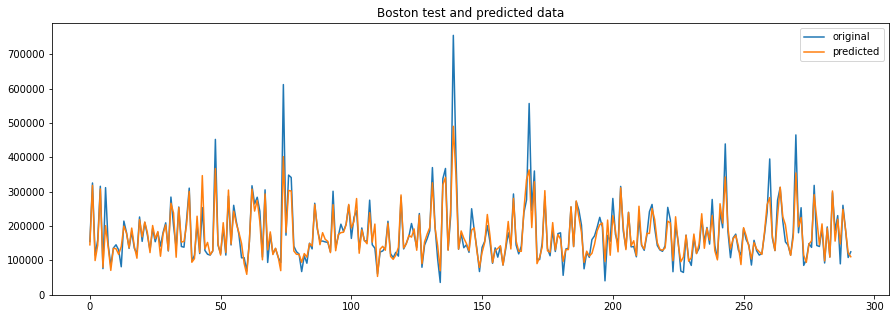

In [94]:
x_ax = range(len(val_predictions5))
plt.figure(figsize=(15,5))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, val_predictions5, label="predicted")

plt.title("Boston test and predicted data")

plt.legend()
plt.show()

# Modelo 6

In [99]:
from sklearn.linear_model import SGDRegressor

In [122]:
params6 = {'penalty':['l1', 'l2', 'elasticnet'],
          'alpha':[2,1.5,1,0.1,0.001,0.0001, 0.000001],
          'l1_ratio':[0.1,0.15, 0.25, 0.55, 0.75],
          }

In [123]:
# Define a random forest model
model6 = SGDRegressor()
reg6 = RandomizedSearchCV(model6, params6, random_state=42)
search = reg6.fit(X_train, y_train)
bests = search.best_params_
bests

{'penalty': 'l1', 'l1_ratio': 0.1, 'alpha': 1}

In [124]:
model6 = search.best_estimator_
model6.fit(X_train, y_train)
val_predictions6 = model6.predict(X_val)
val_mae6 = mean_absolute_error(val_predictions6, y_val)

print(f"Validation MAE for SGDRegressor Model: {val_mae6}")

Validation MAE for SGDRegressor Model: 19805.699266638636


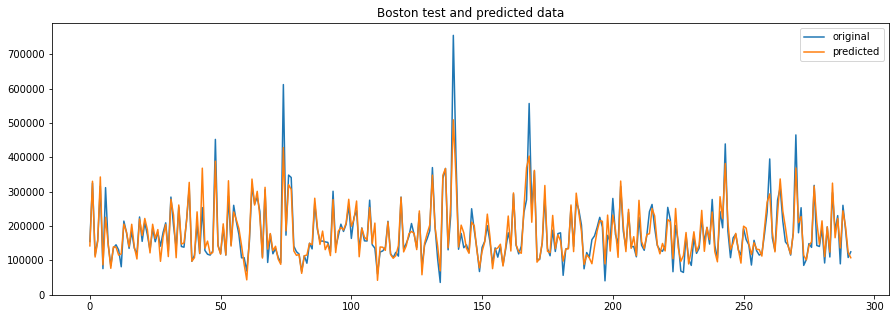

In [125]:
x_ax = range(len(val_predictions6))
plt.figure(figsize=(15,5))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, val_predictions6, label="predicted")

plt.title("Boston test and predicted data")

plt.legend()
plt.show()

# Modelo 7

In [104]:
from sklearn.ensemble import AdaBoostRegressor

In [126]:
params7 = {'n_estimators':[3,5,10,15,25,35,50],
          'loss':['linear','square','exponential']}

In [127]:
# Define a random forest model
model7 = AdaBoostRegressor(random_state=42)
reg7 = RandomizedSearchCV(model7, params7, random_state=42)
search = reg7.fit(X_train, y_train)
bests = search.best_params_
bests

{'n_estimators': 15, 'loss': 'exponential'}

In [128]:
model7 = search.best_estimator_
model7.fit(X_train, y_train)
val_predictions7 = model7.predict(X_val)
val_mae7 = mean_absolute_error(val_predictions7, y_val)

print(f"Validation MAE for AdaBoost Model: {val_mae7}")

Validation MAE for AdaBoost Model: 26901.35615689028


Text(0.5, 1.0, 'Importância de cada feature')

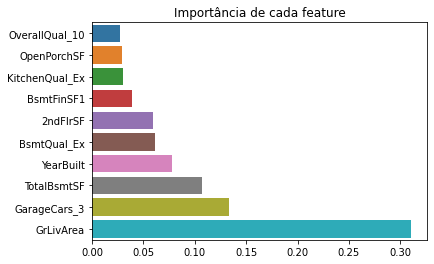

In [129]:
bests = np.sort(model7.feature_importances_)[-10:]
index = []
for importancia in bests:
    index.append(np.where(model7.feature_importances_ == importancia)[0][0])

names = model7.feature_names_in_[index]
sns.barplot(x=bests, y=names, orient='h').set_title('Importância de cada feature')

# Modelo 8

In [49]:
from sklearn.neural_network import MLPRegressor

In [64]:
params8 = {'hidden_layer_sizes':[(100,150,100),(100,120,100), (100,100,100), (100,80,100)],
          'activation':['identity', 'logistic', 'tanh', 'relu'],
          'alpha':[2,1, 0.0001, 0.00001]}

In [65]:
# Define a random forest model
model8 = MLPRegressor(max_iter=500)
reg8 = RandomizedSearchCV(model8, params8, random_state=42)
search = reg8.fit(X_train, y_train)
bests = search.best_params_
bests

{'hidden_layer_sizes': (100, 120, 100), 'alpha': 1e-05, 'activation': 'relu'}

In [66]:
model8 = search.best_estimator_
model8.fit(X_train, y_train)
val_predictions8 = model8.predict(X_val)
val_mae8 = mean_absolute_error(val_predictions8, y_val)

print(f"Validation MAE for MLP Model: {val_mae8}") # 24400 com (900,) # 18983 com (100,150,100)

Validation MAE for MLP Model: 19023.390605807108


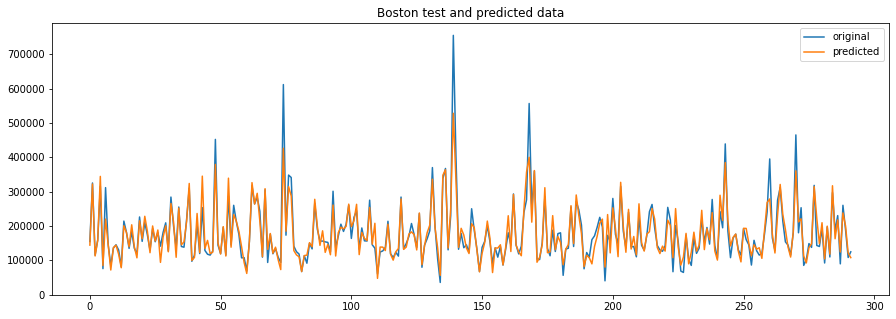

In [57]:
x_ax = range(len(val_predictions8))
plt.figure(figsize=(15,5))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, val_predictions8, label="predicted")

plt.title("Boston test and predicted data")

plt.legend()
plt.show()

# Modelo 9

In [144]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [152]:
params9 = {'loss':['absolute_error', 'poisson', 'squared_error'],
           'learning_rate':[1,0.1,0.01],
           #'max_iter':100,
           'max_leaf_nodes':[10,50, 70],
           'max_depth':[None,5,11,15],
           'min_samples_leaf':[10,20,30,40,50],
           'l2_regularization':[0.0, 0.5, 1.0, 1.5, 2],
           #'max_bins':255,
           #categorical_features=None
          }

In [153]:
# Define a random forest model
model9 = HistGradientBoostingRegressor()
reg9 = RandomizedSearchCV(model9, params9, random_state=42)
search = reg9.fit(X_train, y_train)
bests = search.best_params_
bests

{'min_samples_leaf': 20,
 'max_leaf_nodes': 51,
 'max_depth': 11,
 'loss': 'poisson',
 'learning_rate': 0.1,
 'l2_regularization': 1.5}

In [154]:
model9 = search.best_estimator_
model9.fit(X_train, y_train)
val_predictions9 = model9.predict(X_val)
val_mae9 = mean_absolute_error(val_predictions9, y_val)

print(f"Validation MAE for HistGradientBoosting Model: {val_mae9}") #16243.79818138175 sem escaler

Validation MAE for HistGradientBoosting Model: 18208.77712518982


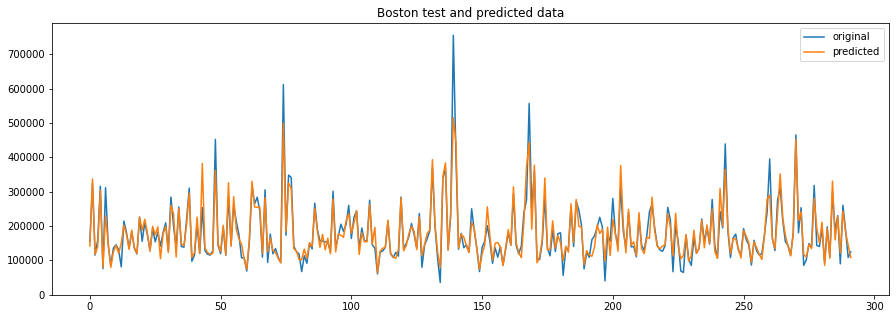

In [155]:
x_ax = range(len(val_predictions9))
plt.figure(figsize=(15,5))
plt.plot(x_ax, y_val, label="original")
plt.plot(x_ax, val_predictions9, label="predicted")

plt.title("Boston test and predicted data")

plt.legend()
plt.show()

# Dimensionality Reduction

In [164]:
pca = PCA(n_components=10)
pca_fit = pca.fit(X_train)
pca.explained_variance_ratio_

array([0.25313215, 0.11109221, 0.08856536, 0.0720517 , 0.04794155,
       0.04454213, 0.04275456, 0.03420859, 0.03152808, 0.02551945])

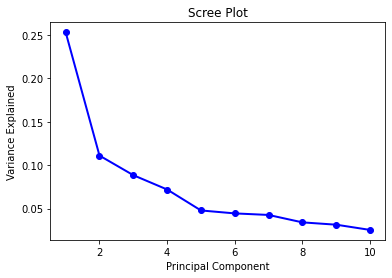

In [165]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [166]:
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

## Random Forest

In [167]:
# Defining the hyperparameter space
params = {'n_estimators':[25,50,70,100],
         'max_depth':[50,100,150,200,250],
         'min_samples_split':[2,3,4,5,8,10,25,35],
         'min_samples_leaf':[1,3,5],
         'max_features':["auto", "sqrt", "log2"]}

In [168]:
# Define a random forest model and applying RandomizedSearchCV
model2 = RandomForestRegressor(random_state=42)
reg = RandomizedSearchCV(model2, params, random_state=42)
search = reg.fit(X_train, y_train)
bests = search.best_params_
bests

{'n_estimators': 70,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 100}

In [169]:
model2 = search.best_estimator_
model2.fit(X_train, y_train)
val_predictions2 = model2.predict(X_val)
val_mae2 = mean_absolute_error(val_predictions2, y_val)

print(f"Validation MAE for Random Forest Model: {val_mae2}")

Validation MAE for Random Forest Model: 18240.811570391044


## SVM

In [170]:
params5 = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
          'degree':[5,10,15,20,30,50],
          'C':[200,500,700,900,1100]}

In [171]:
# Define a random forest model
model5 = SVR()
reg5 = RandomizedSearchCV(model5, params5, random_state=42)
search = reg5.fit(X_train, y_train)
bests = search.best_params_
bests

{'kernel': 'linear', 'degree': 30, 'C': 700}

In [172]:
model5 = search.best_estimator_
model5.fit(X_train, y_train)
val_predictions5 = model5.predict(X_val)
val_mae5 = mean_absolute_error(val_predictions5, y_val)

print(f"Validation MAE for SVM Model: {val_mae5}")

Validation MAE for SVM Model: 18594.350493749775


## HistGradient

In [173]:
params9 = {'loss':['absolute_error', 'poisson', 'squared_error'],
           'learning_rate':[1,0.1,0.01],
           #'max_iter':100,
           'max_leaf_nodes':[10,50, 70],
           'max_depth':[None,5,11,15],
           'min_samples_leaf':[10,20,30,40,50],
           'l2_regularization':[0.0, 0.5, 1.0, 1.5, 2],
           #'max_bins':255,
           #categorical_features=None
          }

In [174]:
# Define a random forest model
model9 = HistGradientBoostingRegressor()
reg9 = RandomizedSearchCV(model9, params9, random_state=42)
search = reg9.fit(X_train, y_train)
bests = search.best_params_
bests

{'min_samples_leaf': 10,
 'max_leaf_nodes': 10,
 'max_depth': 11,
 'loss': 'squared_error',
 'learning_rate': 0.1,
 'l2_regularization': 0.0}

In [175]:
model9 = search.best_estimator_
model9.fit(X_train, y_train)
val_predictions9 = model9.predict(X_val)
val_mae9 = mean_absolute_error(val_predictions9, y_val)

print(f"Validation MAE for HistGradientBoosting Model: {val_mae9}") #16243.79818138175 sem escaler

Validation MAE for HistGradientBoosting Model: 18616.173273462497


# Submissão

In [ ]:
X = pd.concat([X_train, X_val])
print(X_train.shape)
print(X_val.shape)
print(X.shape)
y = pd.concat([y_train, y_val])
print(y_train.shape)
print(y_val.shape)
print(y.shape)

In [ ]:
best_model = HistGradientBoostingRegressor(loss='poisson')
model9.fit(X, y)

In [ ]:
# make predictions which we will submit. 
#dteste = xgb.DMatrix(teste) #, label=y_train
#test_preds = best_model.predict(dteste)

In [ ]:
test_preds = model9.predict(teste)

In [ ]:
# Run the code to save predictions in the format used for competition scoring
output = pd.DataFrame({'Id': Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)